**BSP 2025-2026/1**

**Total of 20 marks**

**Names/Neptun Codes:**

**Marks attained for this part of the homework will count towards your final grade.**

**To attain (full) marks for a question, any answer that includes images or a piece of knowledge, which should be referenced/cited, needs to highlight the source (book, article or web address). You are encouraged to help each other, but identical solutions will not be graded.**

**Write your codes to this document for the full marks. Rename the document to: BSP25_05_TEAM_MONOGRAM**

## Task 1
(7 point)
Present an open source and state-of-the-art Python toolbox for biomedical signal analysis. Introduce the toolbox’s main components, features, and if applicable, its validation process. Demonstrate its usage with examples based on data you have downloaded. Finally, discuss the main limitations of the selected toolbox and suggest possible improvements.

## Task 2
### a) Calculate z-transform (0.5 point)

An $L$ th-order average filter is a linear shift-invariant system that, for an input $x(n)$, produces the output

$$
y(n) = \frac{1}{L+1} \sum_{k=0}^{L} x(n-k)
$$

Find the frequency response of this system.

---

### b) Python routine (0.5 point)

Write your own Python routine from basic commands (i.e., without help from any Python toolbox) to plot the magnitude and phase response of the filter obtained in 1.a). Use normalized frequency \( f \) for the x-axis (i.e., divide by the sampling frequency), and plot in the range $( 0 \leq f \leq 1 )$.

**Hint:** Note that $( \omega = 2\pi f )$. You will need to define \( f \) (with enough elements to get a smooth result), then substitute it into the equations to compute and plot the magnitude and phase response.

---

### c) Plot signal (0.5 point)

Download the `complex.mat` file. In the `names` fields, you can check the recorded parameters. Plot the signals on a common plot.

**Hint:** You can use your own function, but remember to correct for the base and gain. Make sure to label axes and use the correct units.

---

### d) Filter signal (0.5 point)

Use the filter designed in 1.b) on the central venous pressure (CVP) signal. The signal is provided in the `Complex_signal.mat`, `mgh119m.hea` and `mgh119m.info` files. Plot your result.

**Hint:** You used the `filter(b, a, signal)` function in the previous assignment.

---

### e) Filter in physical form (0.5 point)

Write down the underlying difference equation of the filter from Task 2 in the following form:

$$
y(n) + a_1 y(n-1) + \dots + a_k y(n-k) = b_0 x(m) + b_1 x(m-1) + \dots + b_l x(m-l)
$$

---

### f) Signal-flow diagram (0.5 point)

Draw the signal-flow diagram for the realization of the filter (using adders, multipliers, and delay elements).

---

### g) Pole-zero diagram (0.5 point)

Draw the pole-zero diagram for the filter. Is the system stable? Why or why not? You may use the function `pzmap`, but also show how the pole-zero map is related to the transfer function.

### h) Plot ECG Lead II in Time and Frequency Domain (0.5 point)

Take the data from the second ECG lead and plot it in both the time and frequency domains. Answer the following questions:
- What is the bpm (beats per minute)?
- What is the breathing rate?
- What is the frequency of the powerline noise?

---

### i) Filter Powerline Noise with a Butterworth Filter (1 point)

Design a Butterworth filter to remove the powerline noise. Check the quality of the filter using `freqz()`. Plot both the filtered signal and its frequency spectrum.

**Hint:** Use the `butter` function to obtain the filter parameters \( b \) and \( a \). If needed, refer to `doc butter` for more details.

### Implementation

a)
The z-transform of a discrete-time signal $x(n)$ is:
$$
X(z)=\sum_{n=−\infty}^{\infty}x(n)z^{−n}
$$
For a linear time-invariant (LTI) system, the system function $H(z)$ is the z-transform of the impulse response $h(n)$.

The given system is a moving average filter, so its impulse response is:
$$
h(n)=\frac{1}{L+1}\sum_{k=0}^{L}\delta(n-k)
$$

where $\delta(n)$ is the discrete-time impulse.

Z-transform of $h(n)$:
$$
H(z)=Z\{h(n)\}=\sum_{n=-\infty}^{\infty}h(n)z^{-n}
$$
Substitute $h(n)$:
$$
H(z)=\frac{1}{L+1}\sum_{n=0}^{L}z^{-n}
$$

This is a finite geometric series, so we can write it in closed form:
$$
H(z)=\frac{1}{L+1} \cdot \frac{1-z^{L+1}}{1-z^{-1}}​,	z\neq1
$$

The frequency response $H(e^{j\omega})$ is obtained by evaluating $H(z)$ on the unit circle $z=e^{jω}$:
$$
H(e^{jω})=\frac{1}{L+1}\sum_{n=0}^{L}e^{−jωn}=\frac{1}{L+1}\cdot \frac{1-e^{−j\omega(L+1)}}{1−e^{−jω}},	\omega \neq 0
$$

b)

C:\Users\tbalu\AppData\Local\Temp\ipykernel_45704\922742123.py:10: RuntimeWarning: invalid value encountered in divide
  H = (1/(L+1)) * (1 - np.exp(-1j * omega * (L+1))) / (1 - np.exp(-1j * omega))


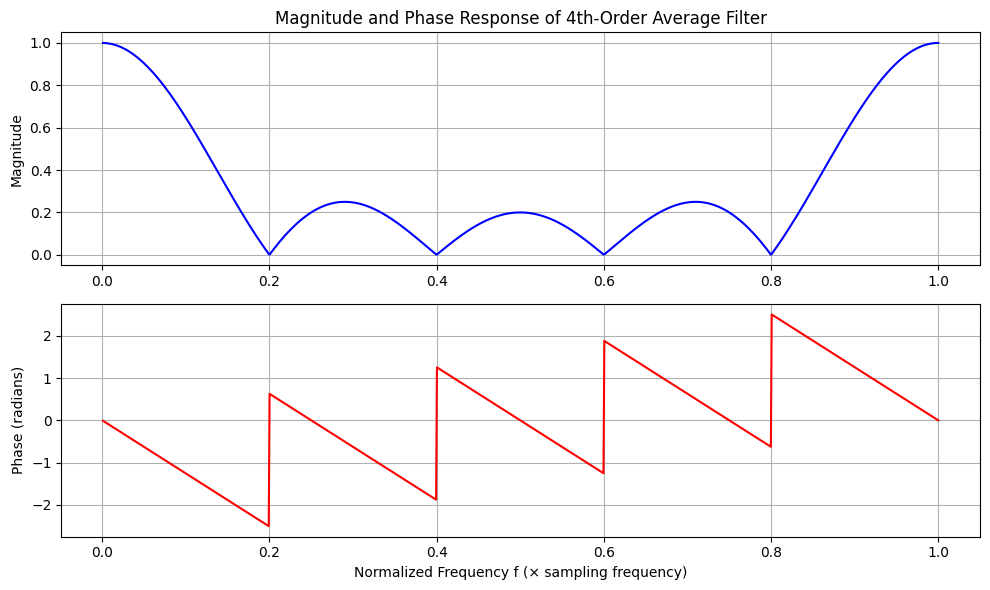

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def response(f, L, N=1000):
    if f is None:
        f = np.linspace(0, 1, N)  # Normalized frequency range (0 to 1)
    omega = 2 * np.pi * f  # Angular frequency

    # Compute frequency response H(e^{jω})
    H = (1/(L+1)) * (1 - np.exp(-1j * omega * (L+1))) / (1 - np.exp(-1j * omega))

    return f, np.abs(H), np.angle(H)

# Parameters
L = 4  # Filter order (you can change this)
N = 1000  # Number of frequency points
f = np.linspace(0, 1, N)  # Normalized frequency range (0 to 1)

# Compute magnitude and phase
f, magnitude, phase = response(f, L, N)

# Plot magnitude response
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(f, magnitude, 'b')
plt.title(f'Magnitude and Phase Response of {L}th-Order Average Filter')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot phase response
plt.subplot(2,1,2)
plt.plot(f, phase, 'r')
plt.ylabel('Phase (radians)')
plt.xlabel('Normalized Frequency f (× sampling frequency)')
plt.grid(True)

plt.tight_layout()
plt.show()



c)

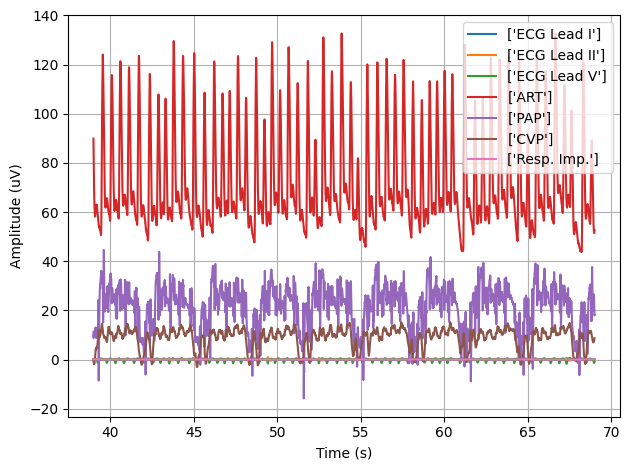

In [2]:
from scipy.io import loadmat

data = loadmat('Data/LAB_05/Complex_signal.mat')['Complex_signal']

# The structure is nested — unpack it
channels = data[0][0][0][0]     # array of channel names
time = data[0][0][1].squeeze()  # time vector
signals = data[0][0][2]         # matrix of signals (channels × samples)

for i, channel in enumerate(channels):
    # plt.figure(figsize=(10, 3))
    # plt.subplot(len(channels), 1, i + 1)
    plt.plot(time, signals[i, :])
    # plt.title(f'Signal from Channel: {channel[0]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (uV)')
    plt.grid(True)
    plt.tight_layout()
plt.legend(channels)
plt.show()


### Task 3 (3 point)

Choose one of the two tasks uploaded to the site. One task involves implementing a Wiener filter, while the other focuses on synchronized averaging. Implement in Python the methodologies outlined in the provided `WienerFilter.pdf` and `SynchronizedAveraging.pdf`.

We chose SynchronizedAveraging.pdf

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


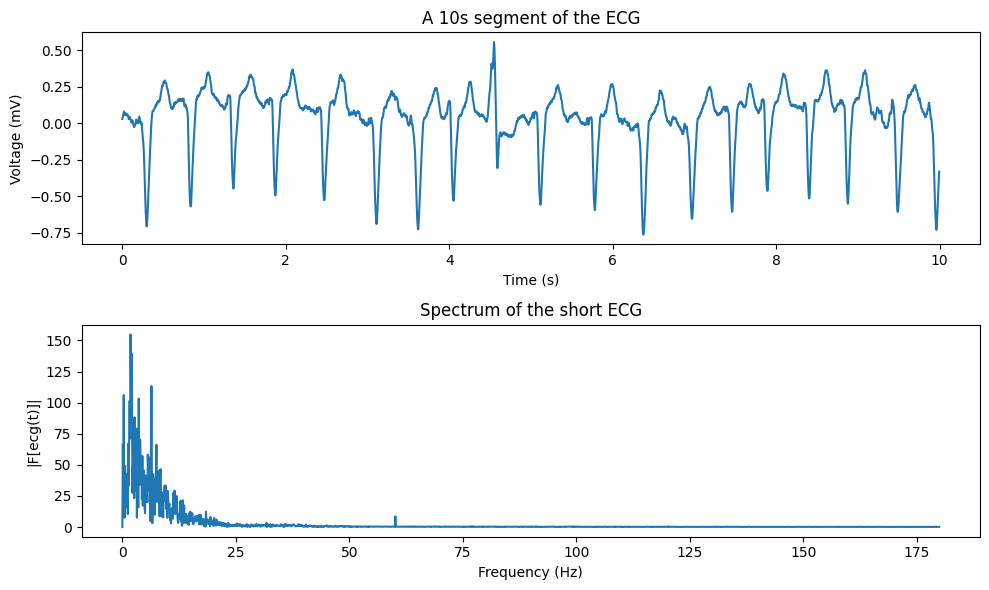

In [4]:
# Load the signal
data = sio.loadmat('Data/Lab_05/Complex_signal.mat')["Complex_signal"]

# The structure is nested — unpack it
channels = data[0][0][0][0]     # array of channel names
time = data[0][0][1].squeeze()  # time vector
signals = data[0][0][2]         # matrix of signals (channels × samples)
# print(channels, time.shape, signals.shape)

ECG = signals[1, :].squeeze()  # ECG signal

# --- Sampling frequency from time vector ---
fs = 1 / np.mean(np.diff(time))
# print(f"Estimated sampling frequency: {fs:.2f} Hz")
# base = float(data['base'])
# gain = float(data['gain'])

# Time vector
t = np.linspace(0, len(ECG)/fs, len(ECG))

# There is no base/gain in the provided .mat file
# Convert to mV (same normalization as MATLAB)
# ECG = (ECG - base) / gain

# Define the short segment
short_time = 10  # seconds
short_sample = int(short_time * fs)

# Choose a regular segment (e.g., starting at 0)
start_idx = 0
end_idx = start_idx + short_sample

ECG_short = ECG[start_idx:end_idx]
t_short = t[start_idx:end_idx]

# Plot the short segment
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_short, ECG_short)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title(f'A {short_time}s segment of the ECG')

# Frequency domain analysis
fECG_short = np.abs(np.fft.fft(ECG_short - np.mean(ECG_short)))
f = np.linspace(0, fs, len(ECG_short))

plt.subplot(2, 1, 2)
plt.plot(f[:short_sample//2], fECG_short[:short_sample//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('|F[ecg(t)]|')
plt.title('Spectrum of the short ECG')

plt.tight_layout()
plt.show()


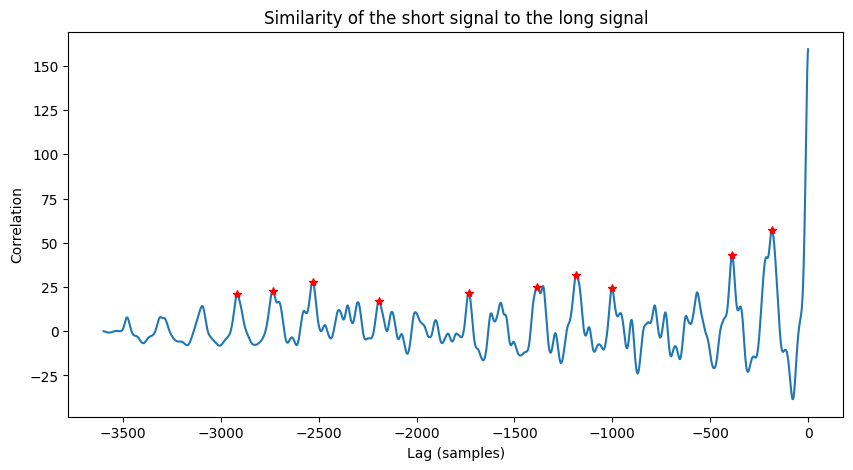

In [5]:
from scipy.signal import correlate, find_peaks

# --- Cross-correlation between short and long signals ---
ECG_corr = correlate(ECG, ECG_short, mode='full')
lags = np.arange(-len(ECG_short) + 1, len(ECG))
# print(f"Correlation length: {len(ECG_corr)}, Lags length: {len(lags)}")

# --- Cut off the zero-overlap (positive lags) region ---
valid_mask = lags <= 0
ECG_corr = ECG_corr[valid_mask]
lags = lags[valid_mask]
# print(f"Correlation length: {len(ECG_corr)}, Lags length: {len(lags)}")

# --- Plot correlation vs lag ---
plt.figure(figsize=(10, 5))
plt.plot(lags, ECG_corr)
plt.xlabel('Lag (samples)')
plt.ylabel('Correlation')
plt.title('Similarity of the short signal to the long signal')

# --- Find peaks in correlation (similar segments) ---
# You can tune these parameters depending on your data
min_peak_distance = int(0.5 * fs)  # e.g., ignore peaks within 0.5 s
min_peak_height = 0.1 * np.max(ECG_corr)  # threshold for peak detection

locs, peaks = find_peaks(ECG_corr, distance=min_peak_distance, height=min_peak_height)

peaks = peaks['peak_heights']

# --- Overlay detected peaks ---
plt.plot(lags[locs], ECG_corr[locs], 'r*')
plt.show()

# print(f"Found {len(peaks)} similar segments.")


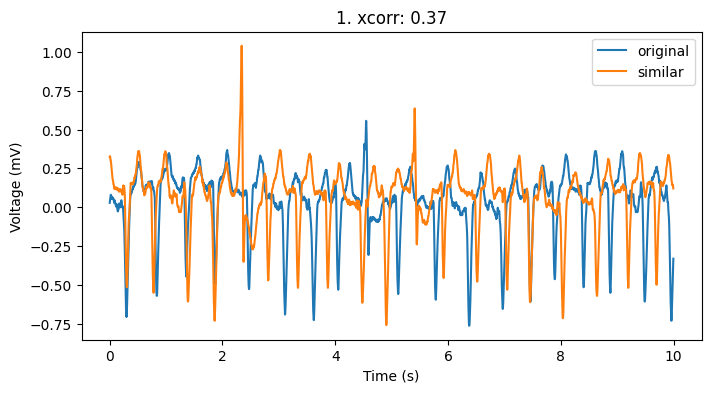

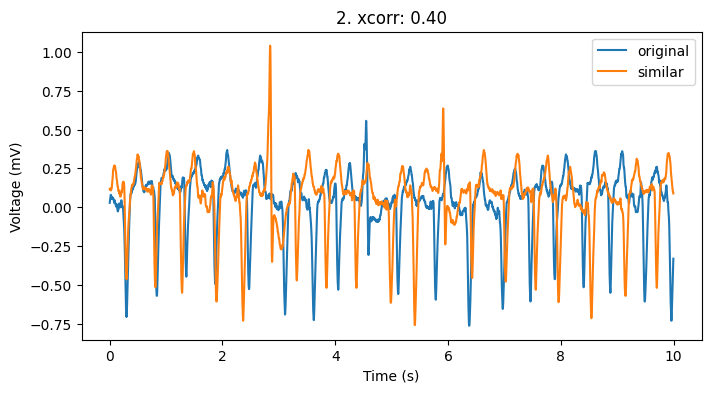

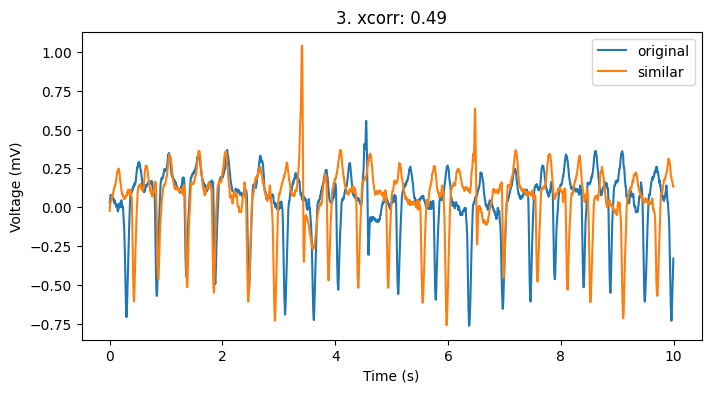

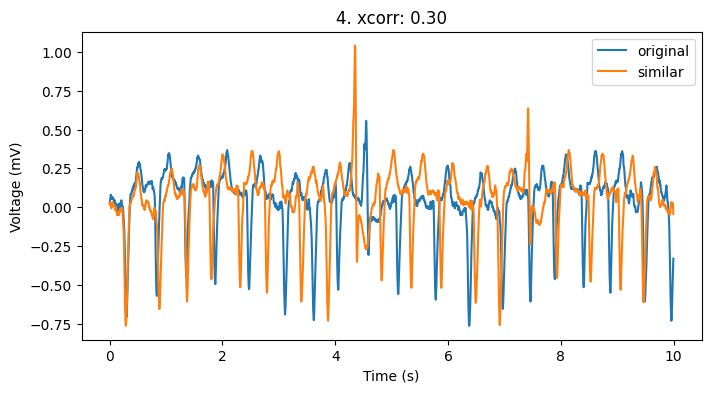

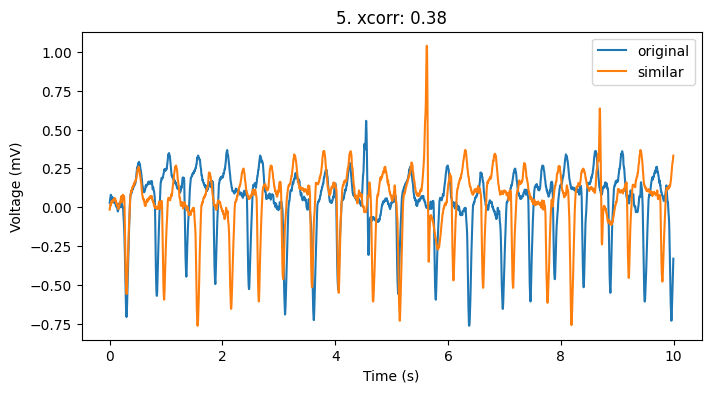

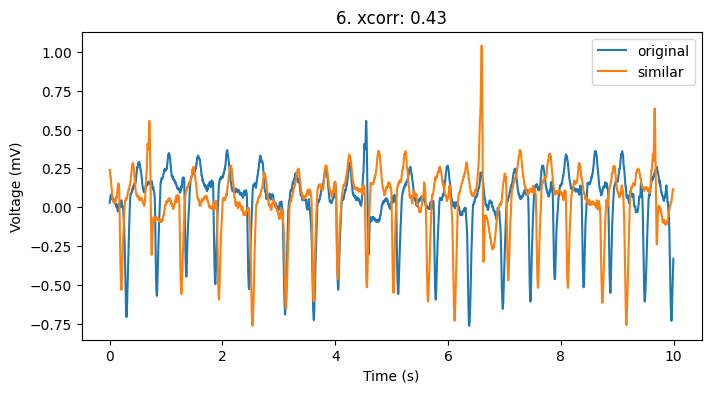

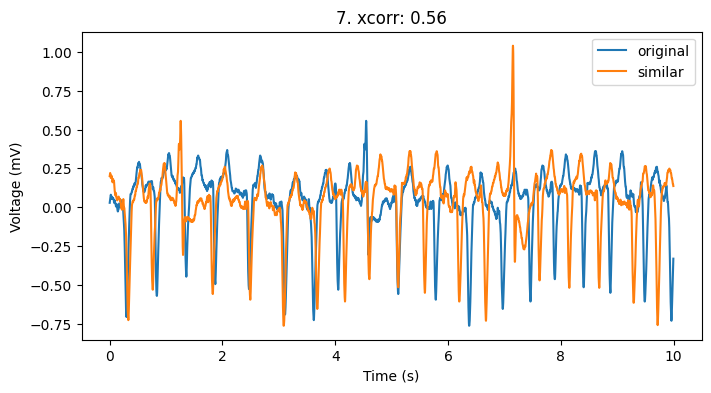

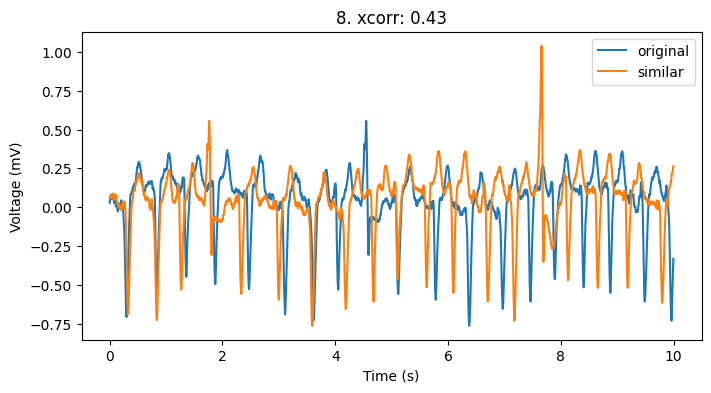

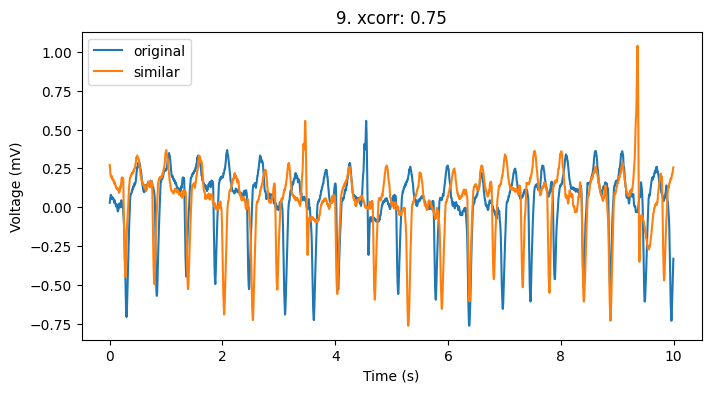

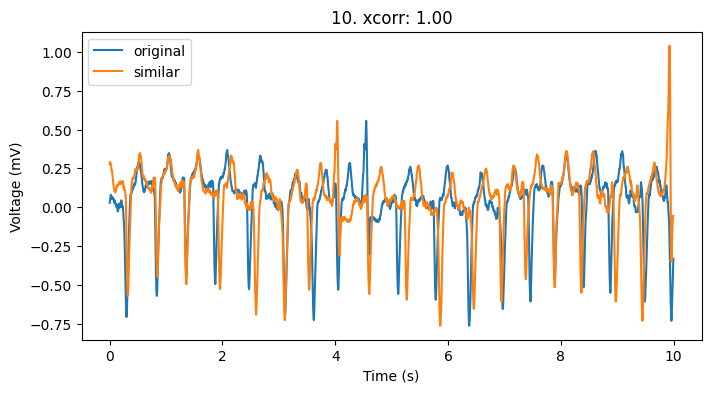

In [6]:
# Store indices of segments that are actually in phase
similars = []

for i, lag_idx in enumerate(locs):
    # Compute start and end indices of the segment in the long ECG
    start_idx = -lags[lag_idx]           # negative lag in MATLAB corresponds to index shift
    end_idx = start_idx + short_sample
    
    # Make sure indices are within bounds
    if start_idx < 0 or end_idx > len(ECG):
        continue
    
    temp = ECG[start_idx:end_idx]
    
    # Plot original short segment and the similar segment
    plt.figure(figsize=(8,4))
    plt.plot(t_short, ECG_short, label='original')
    plt.plot(t_short, temp, label='similar')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    xcorr = peaks[i]/np.max(peaks)
    plt.title(f'{i+1}. xcorr: {xcorr:.2f}')
    plt.legend()
    plt.show(block=False)
    similars.append(i)
    

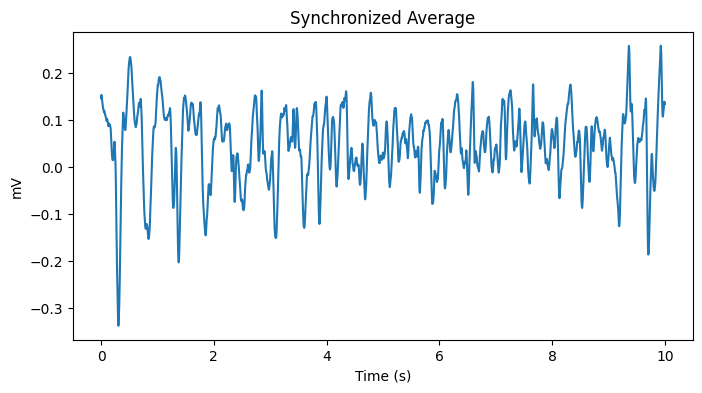

In [7]:
# --- Store the similar segments ---
to_average = np.zeros((len(similars), short_sample))

for i, sim_idx in enumerate(similars):
    start_idx = -lags[locs[sim_idx]]        # negative lag to index shift
    end_idx = start_idx + short_sample
    
    # Make sure indices are within bounds
    if start_idx < 0 or end_idx > len(ECG):
        continue
    
    to_average[i, :] = ECG[start_idx:end_idx]

# --- Average them across the first dimension ---
averaged = np.mean(to_average, axis=0)

# --- Plot the synchronized average ---
plt.figure(figsize=(8, 4))
plt.plot(t_short, averaged)
plt.xlabel('Time (s)')
plt.ylabel('mV')
plt.title('Synchronized Average')
plt.show()


### Task 4 (5 point)

Using the pyPPG toolbox’s prefiltering as a reference, design an equivalent FIR filter for systolic peak detection.
1. Apply the designed FIR filter on the example signal provided by the toolbox.
2. Plot the peak detection results for the IIR filter (from the toolbox) and your FIR filter.
3. Generate and compare the Bode diagram and pole-zero (PZ) map for both the IIR and FIR filters.
4. Provide the transfer functions for both the IIR and FIR filters.
5. Based on the plots (Bode diagram, PZ-map, and peak detection results), explain the differences between the IIR and FIR filters in terms of their frequency response, stability, and peak detection accuracy.

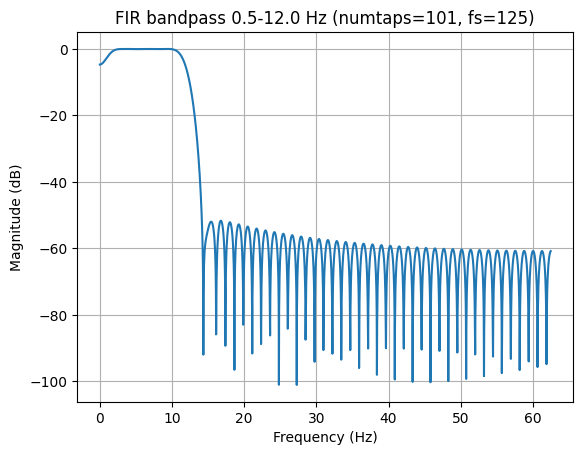

In [8]:
from pyPPG.datahandling import load_data
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 1. Load example PPG signal
fs = 125  # default sampling rate in pyPPG
# ppg_signal = load_data('Data/PPG.mat')
# ppg_signal = load_data('Data/signal.mat')
# ppg_signal = load_data('Data/Sample_PPG_MAT_125Hz.mat')
ppg_signal = load_data('Data/Sample_PPG_CSV_125Hz.csv', fs=fs) # Only this could be loaded. Mat files had some value error
time = np.arange(len(ppg_signal)) / fs

# PARAMETERS (change to match your data)
# fs = 100.0           # sampling frequency (Hz)
lowcut = 0.5         # high-pass cutoff (Hz)
highcut = 12.0       # low-pass cutoff (Hz)
numtaps = 101        # odd -> Type I linear-phase FIR

# DESIGN FIR bandpass using firwin (Hamming window)
bp_coefs = signal.firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=fs, window='hamming')

# (Optional) inspect frequency response
w, h = signal.freqz(bp_coefs, worN=2048, fs=fs)
plt.plot(w, 20*np.log10(np.maximum(np.abs(h),1e-12)))
plt.title(f'FIR bandpass {lowcut}-{highcut} Hz (numtaps={numtaps}, fs={fs})')
plt.xlabel('Frequency (Hz)'); plt.ylabel('Magnitude (dB)'); plt.grid(True)
plt.show()

# SMALL FIR differentiator (5-point central difference) for PPG' (approx)
diff_kernel = np.array([-1, 8, 0, -8, 1], dtype=float) / 12.0 * fs

# Apply to a signal:
# filtered = signal.filtfilt(bp_coefs, [1.0], raw_ppg)   # zero-phase filtering recommended
# ppg_prime = np.convolve(filtered, diff_kernel, mode='same')
